In [1]:
# current date, for retrieving data from proper location.
year = "2024"
month = "July"
day = "16"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters import Raman_Analysis as ra
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
from Analysis_Python_Files.fitters import Raman_Analysis as ra

import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.Constants as cs
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.FreeSpaceImaging_og as fsi_og
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [8]:
key = [0.0001, 0.0177, 0.0354, 0.053, 0.0707, 0.0883, 0.106, 0.124, 0.141, 0.159, 0.177, 0.194, 0.212, 0.229, 0.247, 0.265, 0.282, 0.3, 0.318, 0.335, 0.353, 0.371, 0.388, 0.406, 0.424, 0.441, 0.459, 0.476, 0.494, 0.512, 0.529, 0.547, 0.565, 0.582, 0.6]
data = [39.55105506914466, 38.72766142213834, 39.7939764158727, 39.68242480950423, 38.801787351296916, 39.05782522275941, 40.09823829739676, 39.381295374166406, 39.057416165364934, 38.82857951374899, 39.83089843555698, 39.19992892679912, 39.83929775004123, 39.46195439758608, 40.120875048943006, 39.90286452238571, 39.434595616784, 39.48761965705374, 39.537134745641865, 38.92400792097856, 39.825868373282816, 39.10890280800725, 39.6814044357402, 39.63659265877187, 39.25, 39.0142642418458, 40.308065801094635, 39.831449876312014, 40.094280672563066, 39.39227976843484, 39.56343230814194, 39.182262561077735, 39.25061946724865, 40.195825148349854, 39.548661760318495]
err = [0.4968677462541347, 0.6048227477942019, 0.4372509053690622, 0.5869537206003632, 0.4569828693489134, 0.5316539087911255, 0.39678649456284126, 0.36393104951511024, 0.798392024487225, 0.39028564642216473, 0.5165007219917886, 0.605027901094575, 0.33526422071098566, 0.643515564002213, 0.7374125264045448, 0.7277076341233716, 0.508289892304379, 0.5983681204488878, 0.8326395339541703, 0.7502276122645447, 0.3419876650330384, 0.9391589620759081, 0.6911029141910661, 0.7162924841014919, 0.5, 0.7292260726541254, 0.5345275127473931, 0.652227367694022, 0.48214173587652187, 0.5186916601456335, 0.5741686387879523, 0.5613661297733966, 0.5245710720592824, 0.4870571300974889, 0.48720343598237864]

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

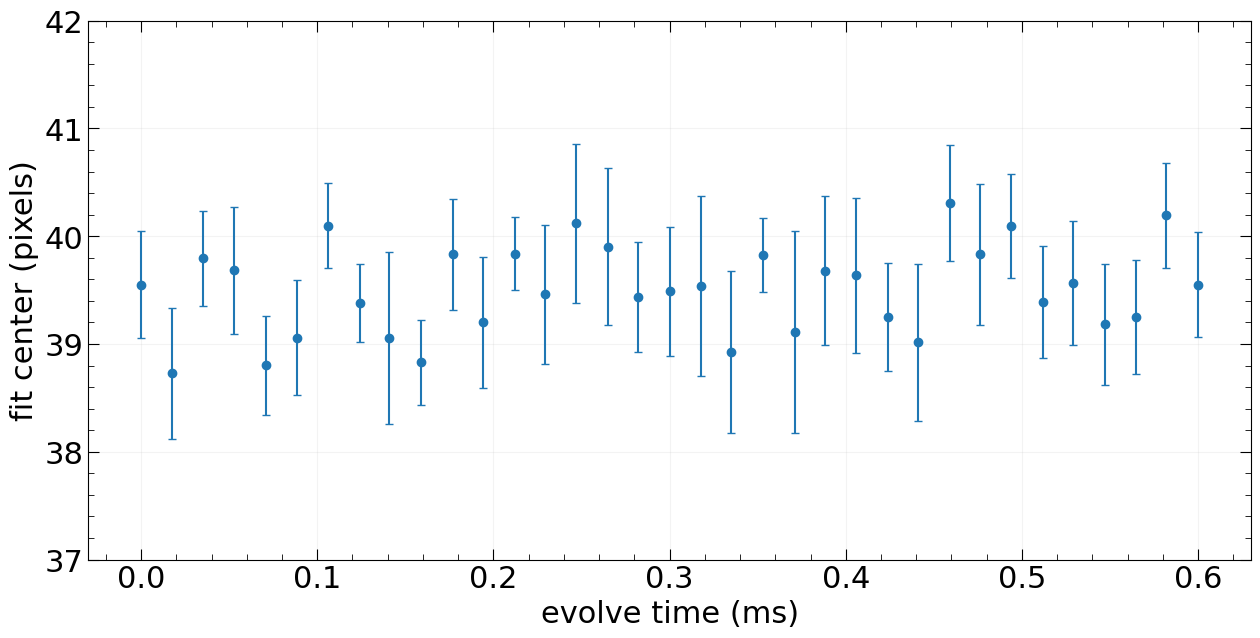

In [10]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

ax.errorbar(key, data, err, marker='o', linestyle='', capsize=3);
ax.set_ylim(37,42)
ax.set_ylabel('fit center (pixels)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

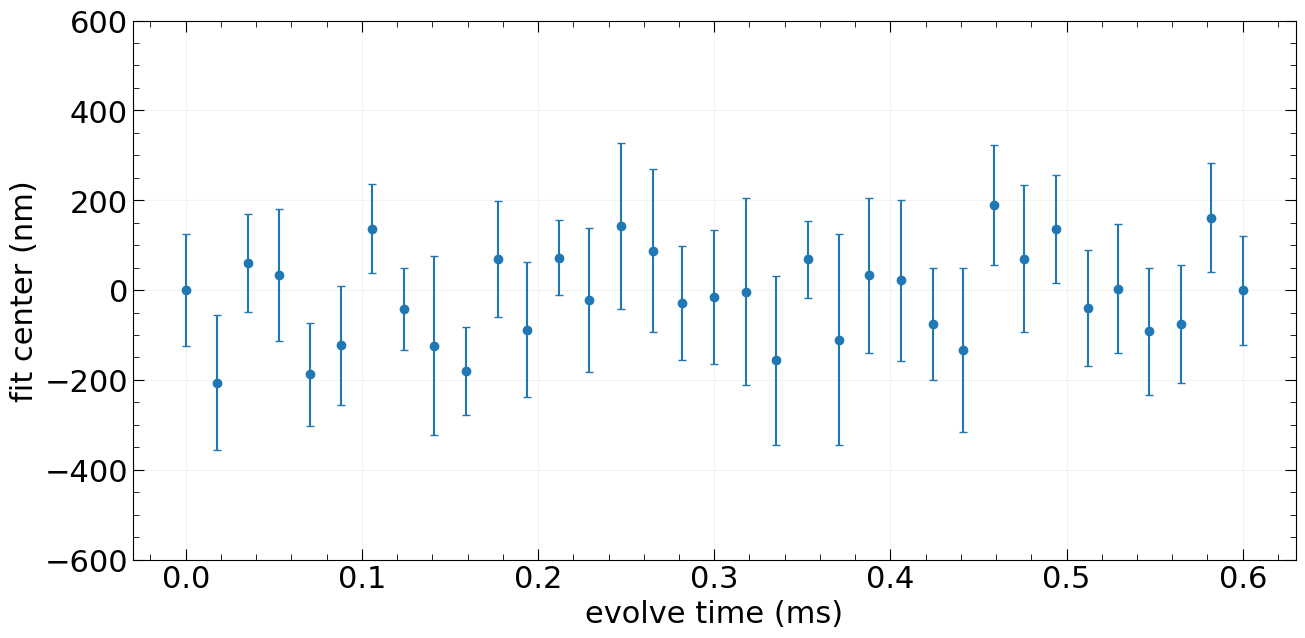

In [26]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);
ax.set_ylim(-600,600)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

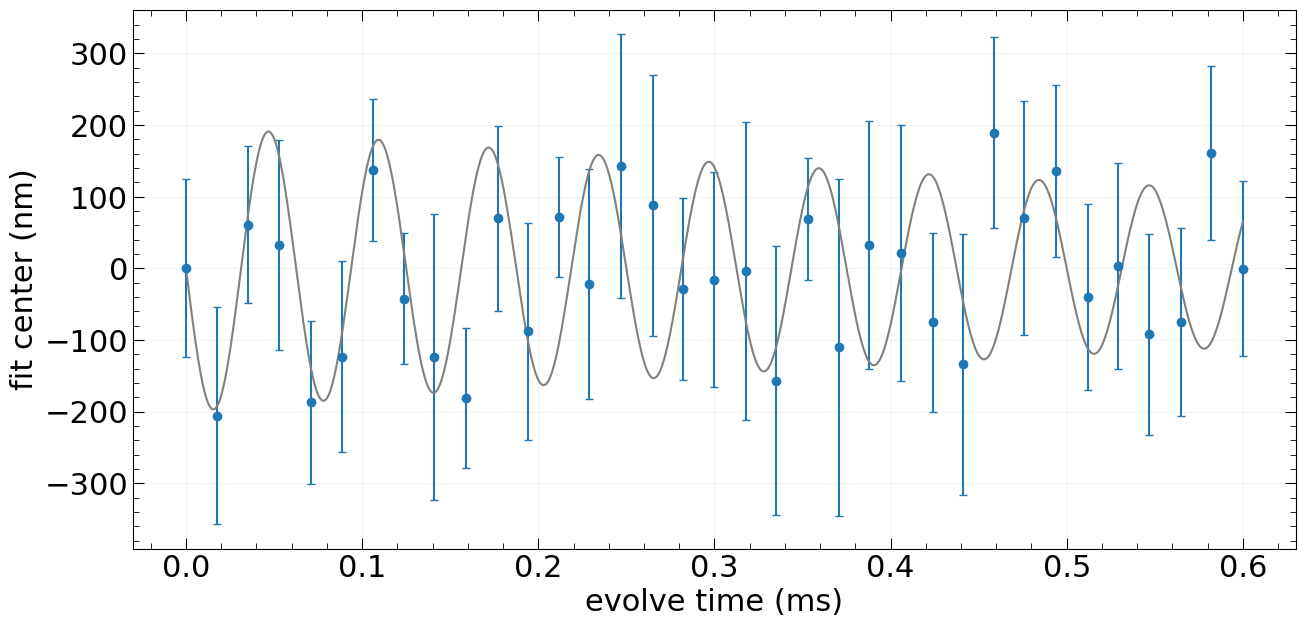

In [62]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);

# Define the decaying sine wave function
def decaying_sine_wave(t, A, gamma, omega, phi):
    return -A * np.exp(-gamma * t) * np.sin(omega * t + phi)

# Example parameter values
A = 200       # Amplitude
gamma = 1    # Decay constant
omega = 2 * np.pi*16  # Angular frequency (1 Hz)
phi = 0.0      # Phase

# Generate time data
time_data = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data using the decaying sine wave function
position_data = decaying_sine_wave(time_data, A, gamma, omega, phi)
ax.plot(time_data, position_data, '-', label='Decaying Sine Wave',color)
# 
# ax.set_ylim(-600,600)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

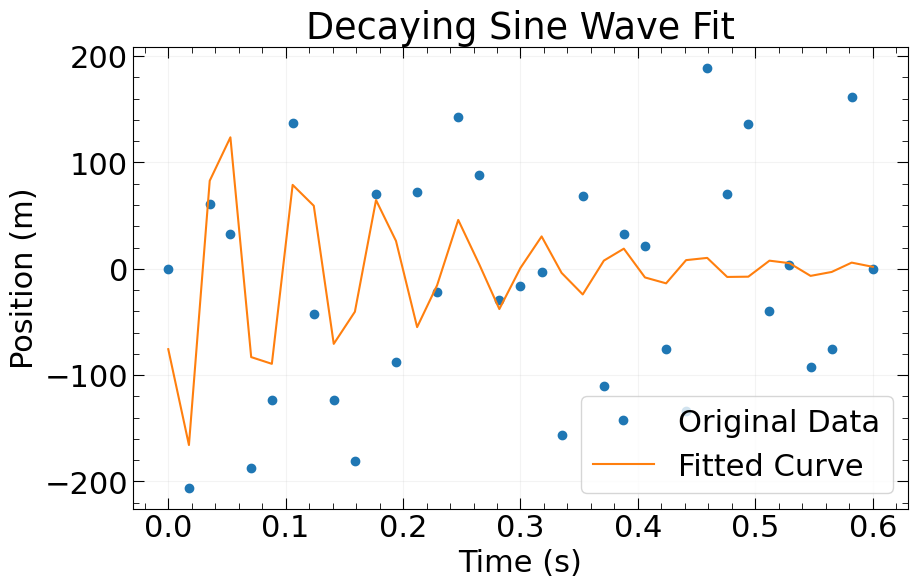

Fitted Parameters:
A = 204.34320956543277
gamma = 5.962912373238314
omega = 93.09275806470045
phi = 0.3701534094483413


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data (replace with your actual position and time data)
time_data = np.array(key)  # Time data (s)
position_data = np.array(distance)  # Position data (m)

# Define the model function for a decaying sine wave
def decaying_sine_wave(t, A, gamma, omega, phi):
    return -A * np.exp(-gamma * t) * np.sin(omega * t + phi)

# Initial guess for the parameters
initial_guess = [200, .1, 2*np.pi*16, 0.0]

# Perform the curve fit
params, params_covariance = curve_fit(decaying_sine_wave, time_data, position_data, p0=initial_guess)

# Extract the fitted parameters
A, gamma, omega, phi = params

# Generate fitted data
fitted_data = decaying_sine_wave(time_data, A, gamma, omega, phi)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_data, position_data, 'o', label='Original Data')
plt.plot(time_data, fitted_data, '-', label='Fitted Curve')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Decaying Sine Wave Fit')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters:\nA = {A}\ngamma = {gamma}\nomega = {omega}\nphi = {phi}")


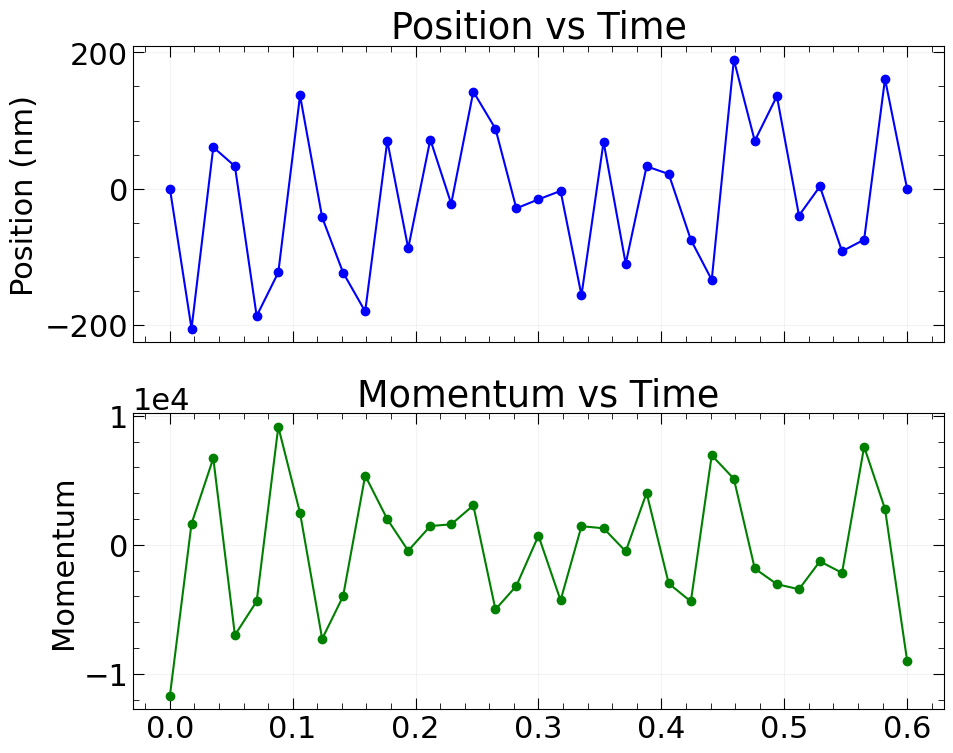

In [121]:
import numpy as np

# Example data
time = np.array(key)  # Time data
position = np.array(distance)  # Position data
mass = 1.0  # Mass of the object
velocity = np.gradient(position, time)
velocity_err = np.zeros_like(velocity)
for i in range(1, len(time) - 1):
    dt = time[i+1] - time[i-1]
    velocity_err[i] = np.sqrt(position_err[i+1]**2 + position_err[i-1]**2) / dt

# Handle boundary points
velocity_err[0] = velocity_err[1]
velocity_err[-1] = velocity_err[-2]

# Calculate the momentum
momentum = mass * velocity

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot position
axs[0].plot(time, position, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Position (nm)')
axs[0].set_title('Position vs Time')
axs[0].grid(True)

# Plot velocity
axs[1].plot(time, momentum, marker='o', linestyle='-', color='g')
axs[1].set_ylabel('Momentum')
axs[1].set_title('Momentum vs Time')
axs[1].grid(True)



# Show plots
plt.tight_layout()

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

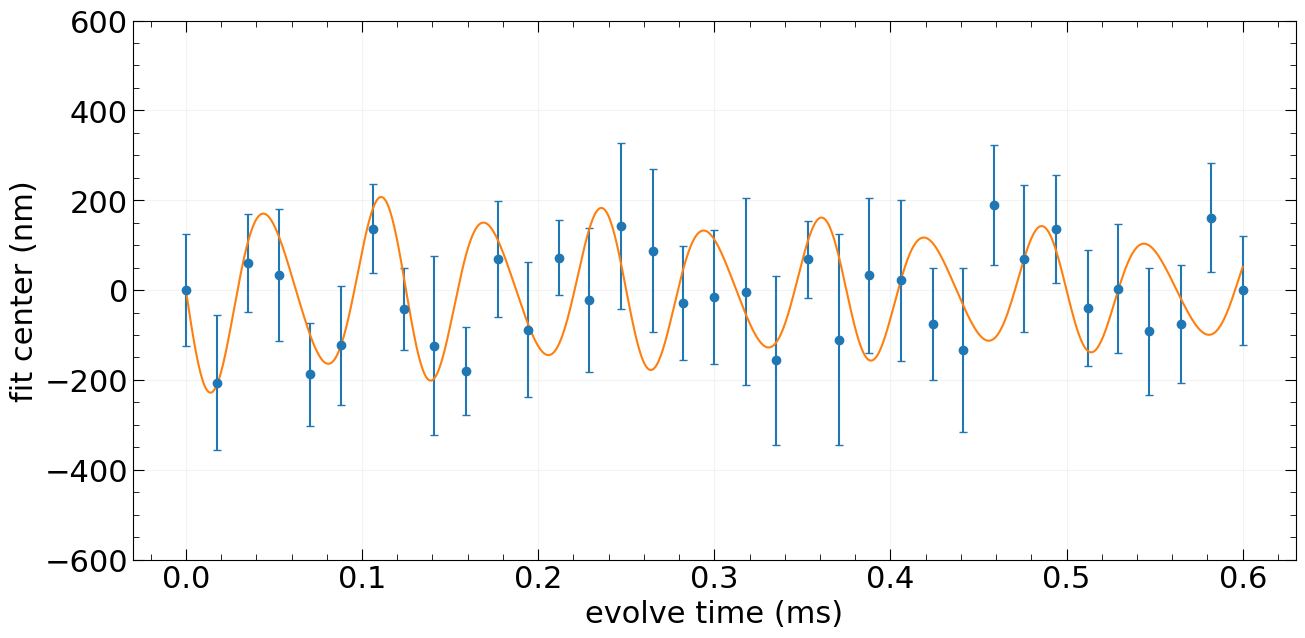

In [95]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);

# Define the decaying sine wave function
def decaying_sine_wave(t, A, gamma, omega, phi):
    return -A * np.exp(-gamma * t) * np.sin(omega * t + phi)

# Example parameter values
A = 200       # Amplitude
gamma = 1    # Decay constant
omega = 2 * np.pi*16  # Angular frequency (1 Hz)
phi = 0.0      # Phase

# Generate time data
time_data = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data using the decaying sine wave function
position_data = decaying_sine_wave(time_data, A, gamma, omega, phi)+ decaying_sine_wave(time_data, A/5, gamma, omega*1.5, phi)
ax.plot(time_data, position_data, '-', label='Decaying Sine Wave')
# 
ax.set_ylim(-600,600)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

In [127]:
1-15/15.9

0.05660377358490565

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


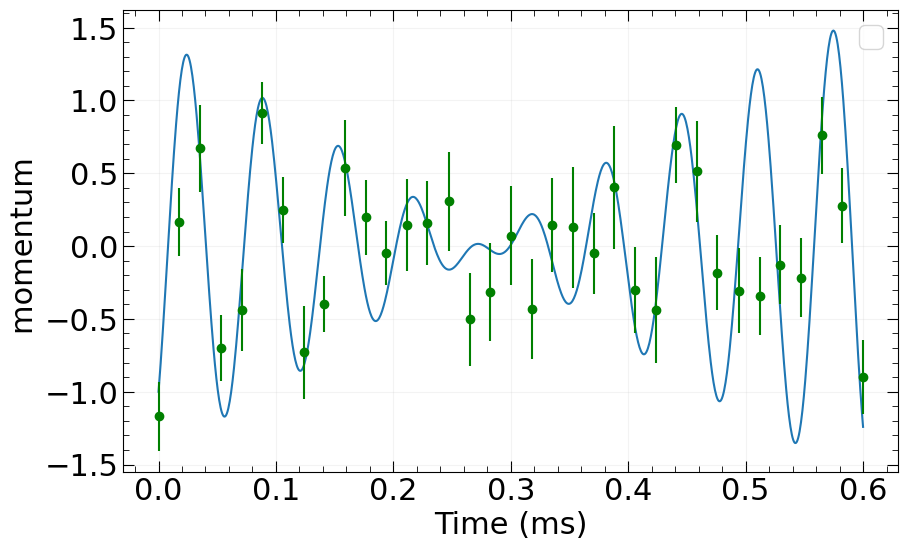

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust these to match your system)
A = 1.0  # Amplitude
omega1 = 2 * np.pi * 15  # Frequency 1 (rad/s)
omega2 = 2 * np.pi * 15.9 # Frequency 2 (rad/s)
phi1 = -np.pi/2  # Phase 1
phi2 = 0.0  # Phase 2
gamma = 0.01  # Decay constant for damping

# Generate time data
t = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data with beating
position = A * (np.exp(-gamma * t) * (np.sin(omega1 * t + phi1) + np.sin(omega2 * t + phi2)))

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.errorbar(time, momentum*1e-4, yerr=velocity_err*5e-5,marker='o', linestyle='', color='g')

plt.xlabel('Time (ms)')
plt.ylabel('momentum ')
# plt.title('Position vs Time with Beating and Revival')
plt.legend()
plt.grid(True)
plt.show()



In [139]:
key = [0.0001, 0.0177, 0.0354, 0.053, 0.0707, 0.0883, 0.106, 0.124, 0.141, 0.159, 0.177, 0.194, 0.212, 0.229, 0.247, 0.265, 0.282, 0.3, 0.318, 0.335, 0.353, 0.371, 0.388, 0.406, 0.424, 0.441, 0.459, 0.476, 0.494, 0.512, 0.529, 0.547, 0.565, 0.582, 0.6]
data = [38.13984932046544, 38.097745496123366, 36.472094554763416, 37.96071964199548, 38.1771277083233, 38.34266160251794, 37.70391237096267, 38.59813800143171, 38.16157036093688, 38.37579069718335, 37.66728988963856, 37.59443341932192, 38.22455277194528, 38.20957310188803, 38.22935248172486, 38.056862215988616, 37.841933757700865, 38.72741900349137, 38.838550929019206, 38.04175882676018, 38.087131436898616, 38.41739321437795, 37.92385268146969, 38.35016226835471, 39.66909390954642, 38.67249767622205, 38.270158113525596, 37.64410694492606, 38.78062318606017, 38.378284148673494, 38.7714759034976, 37.9092614569937, 38.20299340780808, 38.858514622224334, 39.15742999993884]
err = [0.6007040918136707, 0.4413569432188379, 0.6689234709971991, 0.46584275269903264, 0.4185255529909311, 0.3703479638640704, 0.38453430960490037, 0.3136273761128717, 0.9020376113835606, 0.4717010424077836, 0.8099591152804229, 0.40190680883803015, 0.47942428920296004, 0.537893150602614, 0.34040731517591627, 0.3607474907767789, 0.4061302111033091, 0.394764128461195, 0.4550721654954402, 0.5148116430397176, 0.5182789138957526, 0.36152387724962004, 0.464185946423608, 0.375877188071635, 0.455491325370817, 0.5950204275618225, 0.49745440350269365, 0.5413441150239849, 0.4463057483041639, 0.43288478524694074, 0.46245930108732575, 0.6275931765123012, 0.3520146620161008, 0.47321389256806723, 0.5894430471148894]


Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

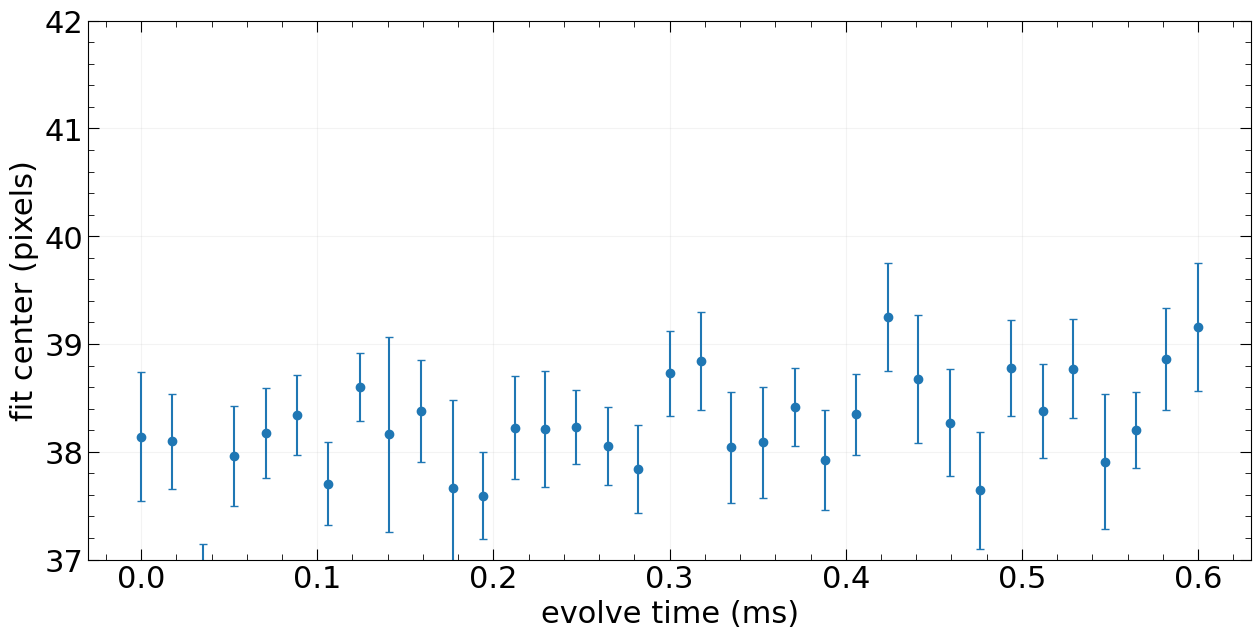

In [140]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

ax.errorbar(key, data, err, marker='o', linestyle='', capsize=3);
ax.set_ylim(37,42)
ax.set_ylabel('fit center (pixels)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

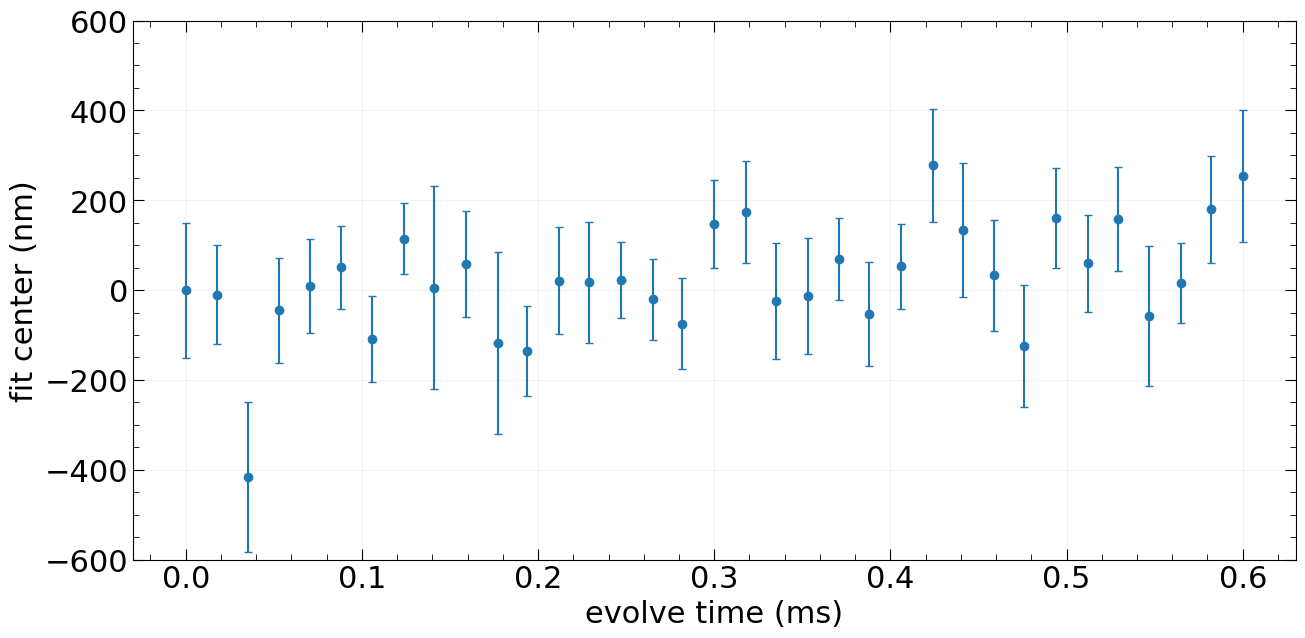

In [141]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);
ax.set_ylim(-600,600)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

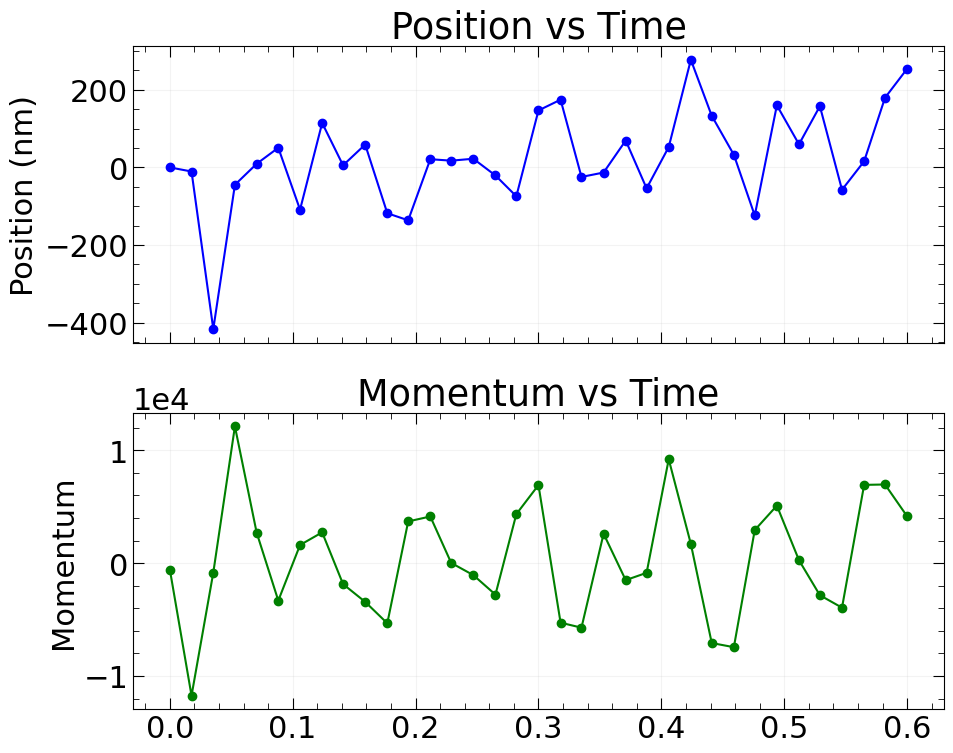

In [142]:
import numpy as np

# Example data
time = np.array(key)  # Time data
position = np.array(distance)  # Position data
mass = 1.0  # Mass of the object
velocity = np.gradient(position, time)
velocity_err = np.zeros_like(velocity)
for i in range(1, len(time) - 1):
    dt = time[i+1] - time[i-1]
    velocity_err[i] = np.sqrt(position_err[i+1]**2 + position_err[i-1]**2) / dt

# Handle boundary points
velocity_err[0] = velocity_err[1]
velocity_err[-1] = velocity_err[-2]

# Calculate the momentum
momentum = mass * velocity

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot position
axs[0].plot(time, position, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Position (nm)')
axs[0].set_title('Position vs Time')
axs[0].grid(True)

# Plot velocity
axs[1].plot(time, momentum, marker='o', linestyle='-', color='g')
axs[1].set_ylabel('Momentum')
axs[1].set_title('Momentum vs Time')
axs[1].grid(True)



# Show plots
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


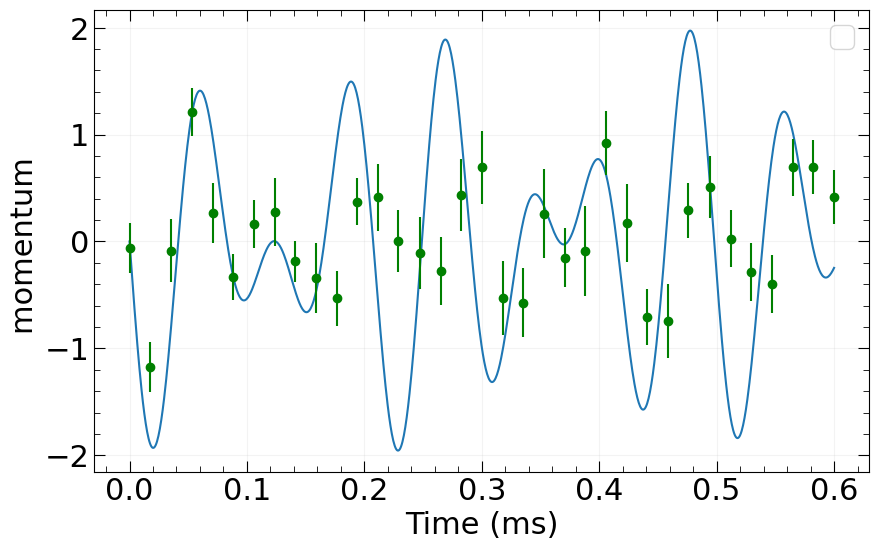

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust these to match your system)
A = 1.0  # Amplitude
omega1 = 2 * np.pi * 10  # Frequency 1 (rad/s)
omega2 = 2 * np.pi * 14.1 # Frequency 2 (rad/s)
phi1 = 0 # Phase 1
phi2 = 0.0  # Phase 2
gamma = 0.01  # Decay constant for damping

# Generate time data
t = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data with beating
position = -A * (np.exp(-gamma * t) * (np.sin(omega1 * t + phi1) + np.sin(omega2 * t + phi2)))

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.errorbar(time, momentum*1e-4, yerr=velocity_err*5e-5,marker='o', linestyle='', color='g')

plt.xlabel('Time (ms)')
plt.ylabel('momentum ')
# plt.title('Position vs Time with Beating and Revival')
plt.legend()
plt.grid(True)
plt.show()



In [157]:
1-10/14

0.2857142857142857

In [159]:
data = [39.63118354887193, 39.82069707715695, 38.45107426853146, 39.22838013826541, 39.4156519362077, 37.89459027792706, 38.45409332503637, 38.79088550601303, 39.0763420860695, 40.10564618466144, 39.356465598701526, 38.68353313356796, 38.97498350386931, 38.925173549881755, 39.8619894442492, 40.098980902704284, 40.58670781567416, 39.91704374173618, 39.145625441006125, 38.4479056169039, 39.997965616575534, 40.20491978883031, 39.29159090848848, 39.80863536519351, 37.72619528339307, 39.78756519211863, 39.71102222190485, 40.11527939457266, 39.886370927986015, 38.89920372512596, 39.40360409311184, 40.08259553190637, 40.02144155406461, 38.145385831762276, 37.76514972149846]
err = [0.2599233504653864, 0.47275233996427035, 0.5421644166880322, 0.4431694276309446, 0.47195444125703484, 0.758070460347912, 0.5386841665951526, 0.5584947152560942, 0.6832750420230314, 0.5145163971954669, 0.8397245745176791, 0.8656533665898192, 0.5644505012381293, 0.9672684622667063, 0.79580203422163, 0.36578137805248945, 0.4802870993844094, 0.6827425032891706, 0.5394292022928744, 0.9581998466078644, 0.3736874907895982, 0.8324698299375398, 1.1399153506571877, 0.6083776210729873, 0.9082264639147104, 0.42419943031878404, 0.7102266361963715, 0.9064348316240692, 0.5947768381008118, 0.38633006413797416, 0.6134215010694627, 0.5361697324302953, 0.5594038218881839, 0.6379625718187684, 0.41859908344117114]
key = [0.0001, 0.0177, 0.0354, 0.053, 0.0707, 0.0883, 0.106, 0.124, 0.141, 0.159, 0.177, 0.194, 0.212, 0.229, 0.247, 0.265, 0.282, 0.3, 0.318, 0.335, 0.353, 0.371, 0.388, 0.406, 0.424, 0.441, 0.459, 0.476, 0.494, 0.512, 0.529, 0.547, 0.565, 0.582, 0.6]


Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

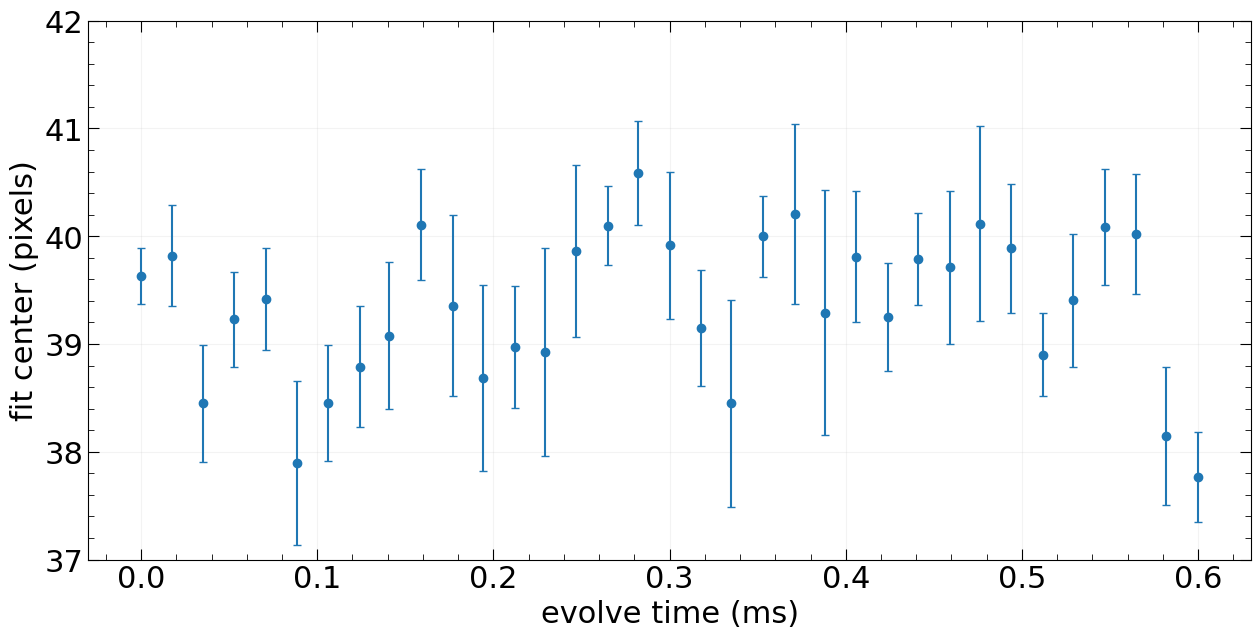

In [160]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

ax.errorbar(key, data, err, marker='o', linestyle='', capsize=3);
ax.set_ylim(37,42)
ax.set_ylabel('fit center (pixels)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

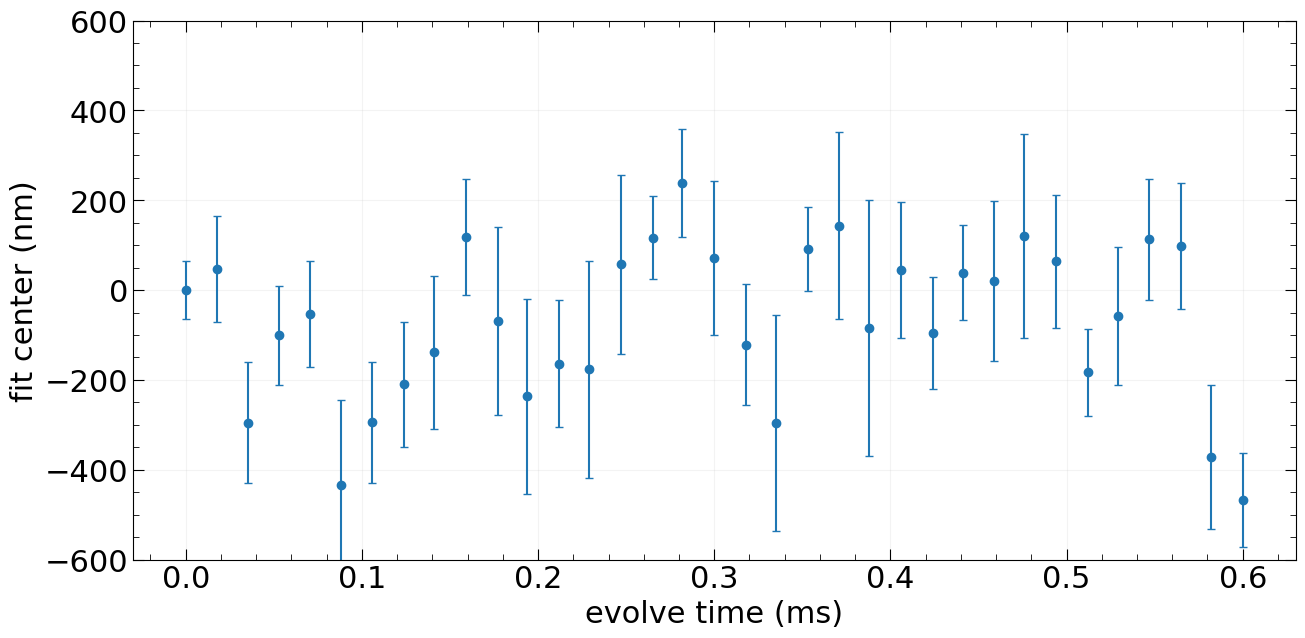

In [161]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[24] = 39.25
err[24] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);
ax.set_ylim(-600,600)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

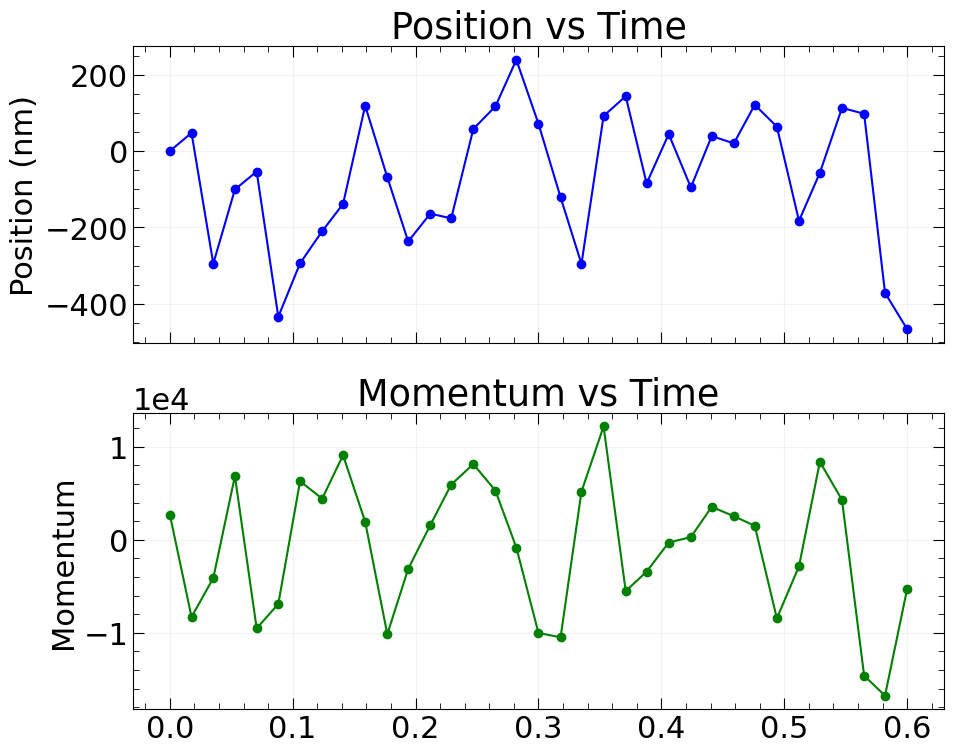

In [162]:
import numpy as np

# Example data
time = np.array(key)  # Time data
position = np.array(distance)  # Position data
mass = 1.0  # Mass of the object
velocity = np.gradient(position, time)
velocity_err = np.zeros_like(velocity)
for i in range(1, len(time) - 1):
    dt = time[i+1] - time[i-1]
    velocity_err[i] = np.sqrt(position_err[i+1]**2 + position_err[i-1]**2) / dt

# Handle boundary points
velocity_err[0] = velocity_err[1]
velocity_err[-1] = velocity_err[-2]

# Calculate the momentum
momentum = mass * velocity

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot position
axs[0].plot(time, position, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Position (nm)')
axs[0].set_title('Position vs Time')
axs[0].grid(True)

# Plot velocity
axs[1].plot(time, momentum, marker='o', linestyle='-', color='g')
axs[1].set_ylabel('Momentum')
axs[1].set_title('Momentum vs Time')
axs[1].grid(True)



# Show plots
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


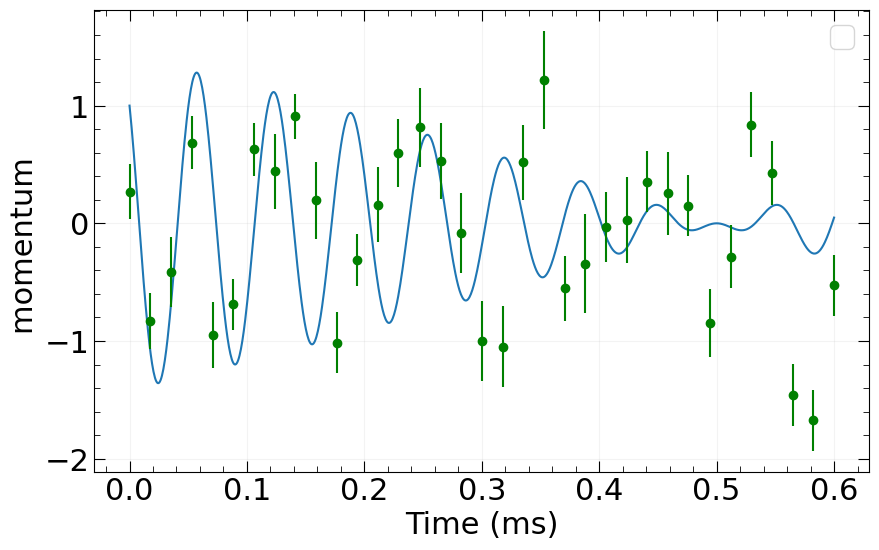

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust these to match your system)
A = 1.0  # Amplitude
omega1 = 2 * np.pi * 15  # Frequency 1 (rad/s)
omega2 = 2 * np.pi * 15.5 # Frequency 2 (rad/s)
phi1 = -np.pi/2  # Phase 1
phi2 = 0.0  # Phase 2
gamma = 0.01  # Decay constant for damping

# Generate time data
t = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data with beating
position = -A * (np.exp(-gamma * t) * (np.sin(omega1 * t + phi1) + np.sin(omega2 * t + phi2)))

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.errorbar(time, momentum*1e-4, yerr=velocity_err*5e-5,marker='o', linestyle='', color='g')

plt.xlabel('Time (ms)')
plt.ylabel('momentum ')
# plt.title('Position vs Time with Beating and Revival')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
data = [28.228428857303406, 34.73164337960165, 35.285591238756915, 36.580493729118146, 33.6662042144904, 37.782532242512566, 37.9172714038851, 36.89083525498177, 36.76893018689995, 36.12925231295745, 35.968634731005366, 34.4536206664941, 38.30108854247159, 37.34651508229426, 37.65640733953033, 37.091503261121005, 37.1724175386441, 37.97761585581788, 38.03729553750983, 37.65268519933191, 39.21910956335709, 37.719894279406354, 38.49204237105147, 34.62004671235173, 37.2538161127611, 38.48670171420151, 38.050360842000956, 38.41599433584495, 38.247818354111075, 38.927938960183056, 38.72432951867191, 38.36796895116935, 38.40047330644619, 39.01754497154176, 38.6731160529283]
err = [2.3287196162734545, 0.7150431879675158, 0.9183950004663736, 0.6523352679936004, 1.0016527734218132, 0.9846420099185113, 0.6817253178863012, 0.7403455035662266, 0.8178654519893398, 0.9100532666922421, 0.8268217542945189, 0.867429298388134, 0.30662820661508233, 0.6054367504158784, 0.7147743745590645, 0.7452344265146701, 0.539836216348323, 0.42428716244895726, 0.5623064188429944, 0.6358861664437844, 0.5459953544016899, 0.4606301396225064, 0.3615684910562032, 0.9993572397265931, 0.5260003409295574, 0.5687534370445483, 0.47121214364833636, 0.46122888252296373, 0.5540070691022004, 0.4425346367138551, 0.3967858836397119, 0.6241658607239213, 0.5843201855258916, 0.47434579374562175, 0.5001642438853161]
key = [0.0001, 0.0177, 0.0354, 0.053, 0.0707, 0.0883, 0.106, 0.124, 0.141, 0.159, 0.177, 0.194, 0.212, 0.229, 0.247, 0.265, 0.282, 0.3, 0.318, 0.335, 0.353, 0.371, 0.388, 0.406, 0.424, 0.441, 0.459, 0.476, 0.494, 0.512, 0.529, 0.547, 0.565, 0.582, 0.6]


Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

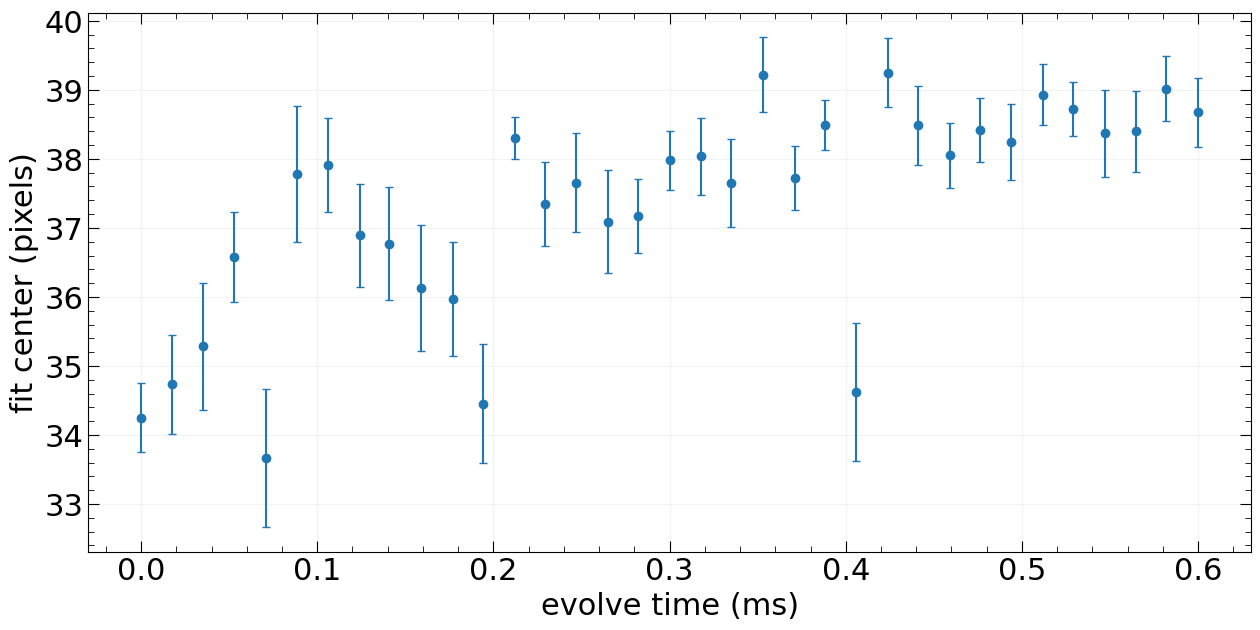

In [9]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[0] = 34.25
err[0] = .5

ax.errorbar(key, data, err, marker='o', linestyle='', capsize=3);
# ax.set_ylim(37,42)
ax.set_ylabel('fit center (pixels)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

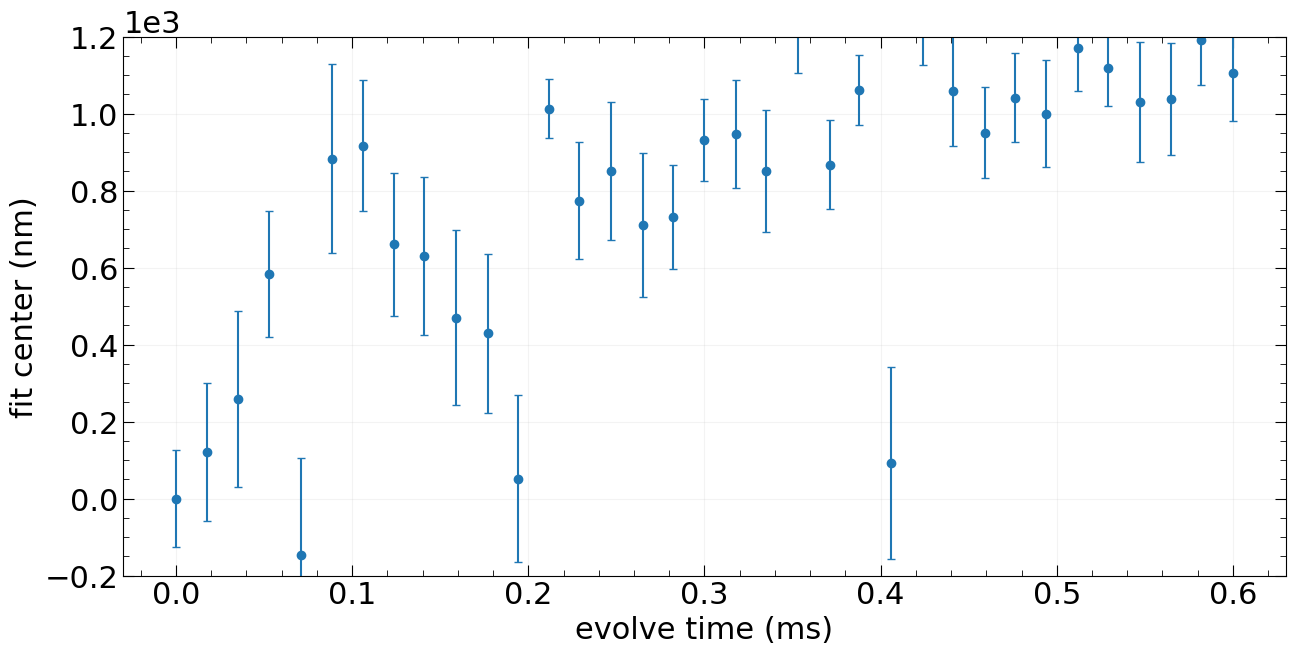

In [13]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[0] = 34.25
err[0] = .5

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);
ax.set_ylim(-200,1200)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


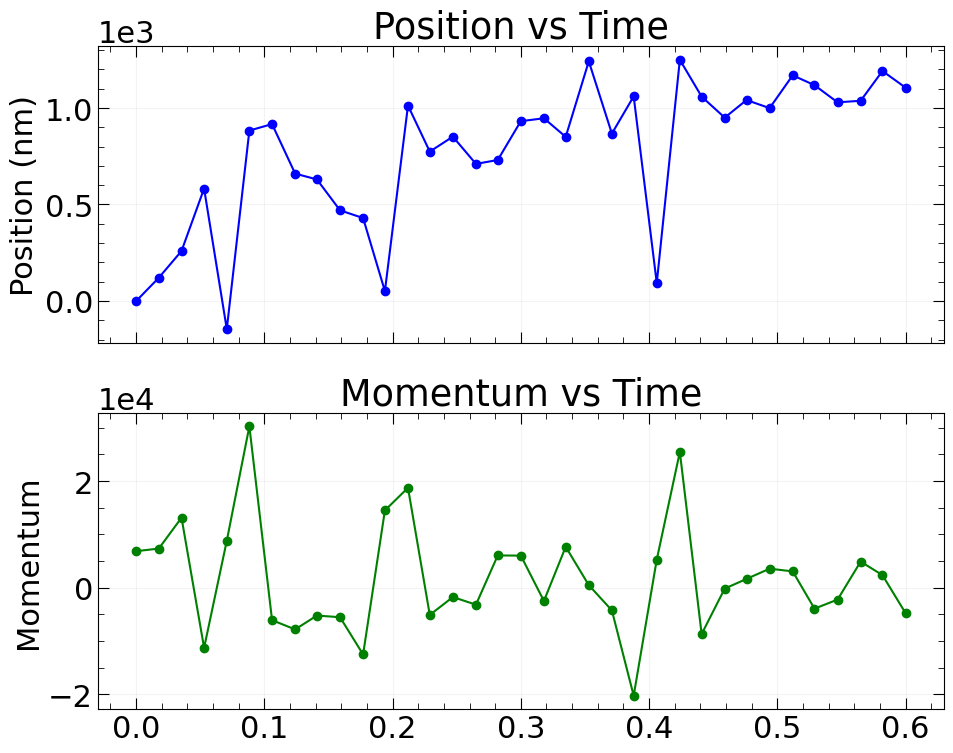

In [16]:
import numpy as np

# Example data
time = np.array(key)  # Time data
position = np.array(distance)  # Position data
mass = 1.0  # Mass of the object
velocity = np.gradient(position, time)
velocity_err = np.zeros_like(velocity)
for i in range(1, len(time) - 1):
    dt = time[i+1] - time[i-1]
    velocity_err[i] = np.sqrt(dist_err[i+1]**2 + dist_err[i-1]**2) / dt

# Handle boundary points
velocity_err[0] = velocity_err[1]
velocity_err[-1] = velocity_err[-2]

# Calculate the momentum
momentum = mass * velocity

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot position
axs[0].plot(time, position, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Position (nm)')
axs[0].set_title('Position vs Time')
axs[0].grid(True)

# Plot velocity
axs[1].plot(time, momentum, marker='o', linestyle='-', color='g')
axs[1].set_ylabel('Momentum')
axs[1].set_title('Momentum vs Time')
axs[1].grid(True)



# Show plots
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


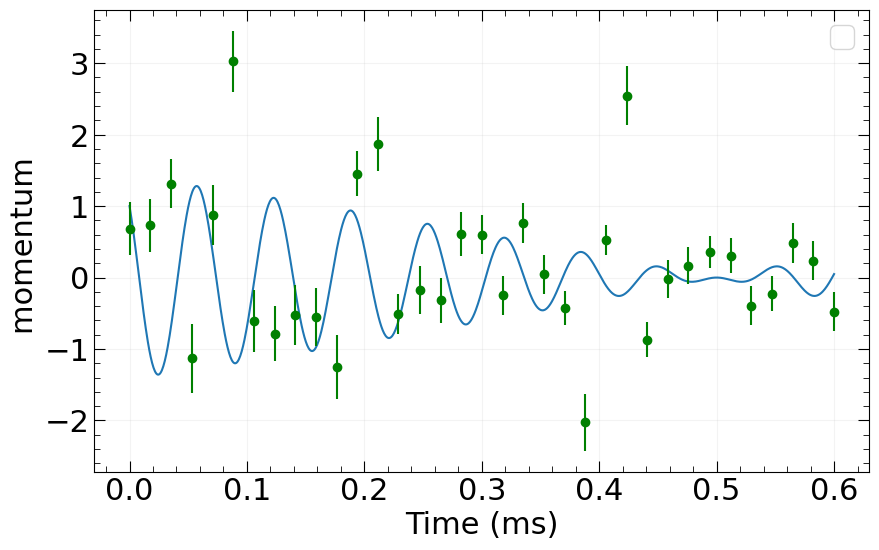

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust these to match your system)
A = 1.0  # Amplitude
omega1 = 2 * np.pi * 15  # Frequency 1 (rad/s)
omega2 = 2 * np.pi * 15.5 # Frequency 2 (rad/s)
phi1 = -np.pi/2  # Phase 1
phi2 = 0.0  # Phase 2
gamma = 0.01  # Decay constant for damping

# Generate time data
t = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data with beating
position = -A * (np.exp(-gamma * t) * (np.sin(omega1 * t + phi1) + np.sin(omega2 * t + phi2)))

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.errorbar(time, momentum*1e-4, yerr=velocity_err*5e-5,marker='o', linestyle='', color='g')

plt.xlabel('Time (ms)')
plt.ylabel('momentum ')
# plt.title('Position vs Time with Beating and Revival')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
key=[0.0001, 0.0177, 0.0354, 0.053, 0.0707, 0.0883, 0.106, 0.124, 0.141, 0.159, 0.177, 0.194, 0.212, 0.229, 0.247, 0.265, 0.282, 0.3, 0.318, 0.335, 0.353, 0.371, 0.388, 0.406, 0.424, 0.441, 0.459, 0.476, 0.494, 0.512, 0.529, 0.547, 0.565, 0.582, 0.6]
data=[32.54538225578454, 34.30662648074581, 37.473118185062056, 37.84157435621124, 38.70820829235764, 36.8617321730718, 36.679095742623424, 36.042641750159476, 36.57382220020238, 37.77025766054225, 37.17426788214956, 36.79322687374276, 36.87609996433876, 36.932499829132574, 36.55249212406341, 37.4561341826857, 37.437189082705046, 36.88153609413917, 35.816455283252246, 38.12875529014068, 36.86732632448324, 36.83060501130567, 37.09695563278283, 37.50475103590708, 36.501250748379846, 36.49024626371466, 36.48916894851094, 37.94363298538422, 37.919860774729024, 36.19750180344279, 38.46716049836125, 37.53596032141163, 38.45111909377352, 38.35207913954347, 38.23308282177759]
err=[2.437023660855987, 1.302218024278434, 0.591699301702667, 0.5915032472069393, 0.7345668648010882, 0.5659154735647158, 0.4565232711277293, 0.8159394878926725, 0.9404100947834787, 0.7717769839107294, 0.8099889423955947, 0.7575752720429362, 0.6484394297462699, 0.5080214278398278, 1.037507347487173, 0.7875504849665813, 0.48302868560848844, 0.7939049297568627, 0.8193626442141149, 0.6189907885025919, 0.7727351721317917, 0.6696949240729576, 0.5424151462529396, 0.6990907683752665, 0.5725092937284771, 0.5667364456246647, 0.7239222685638161, 0.3942006619704339, 0.5565033272255578, 0.7862990928988, 0.9087732242796804, 0.4169521874042417, 0.5697452756618092, 0.6502711310708554, 0.39669882816053936]

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

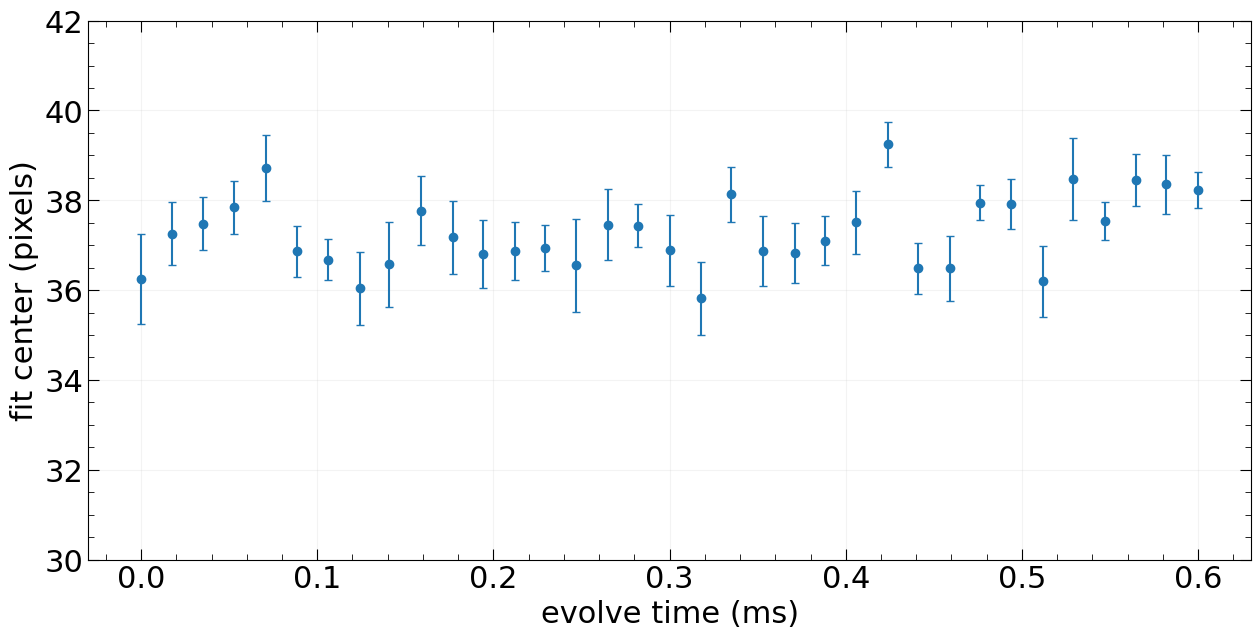

In [12]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[0] = 36.25
err[0] = 1
data[1] = 37.25
err[1] = .7
ax.errorbar(key, data, err, marker='o', linestyle='', capsize=3);
ax.set_ylim(30,42)
ax.set_ylabel('fit center (pixels)')
ax.set_xlabel('evolve time (ms)')

Text(0.5, 0, 'evolve time (ms)')

<Figure size 30000x9600 with 0 Axes>

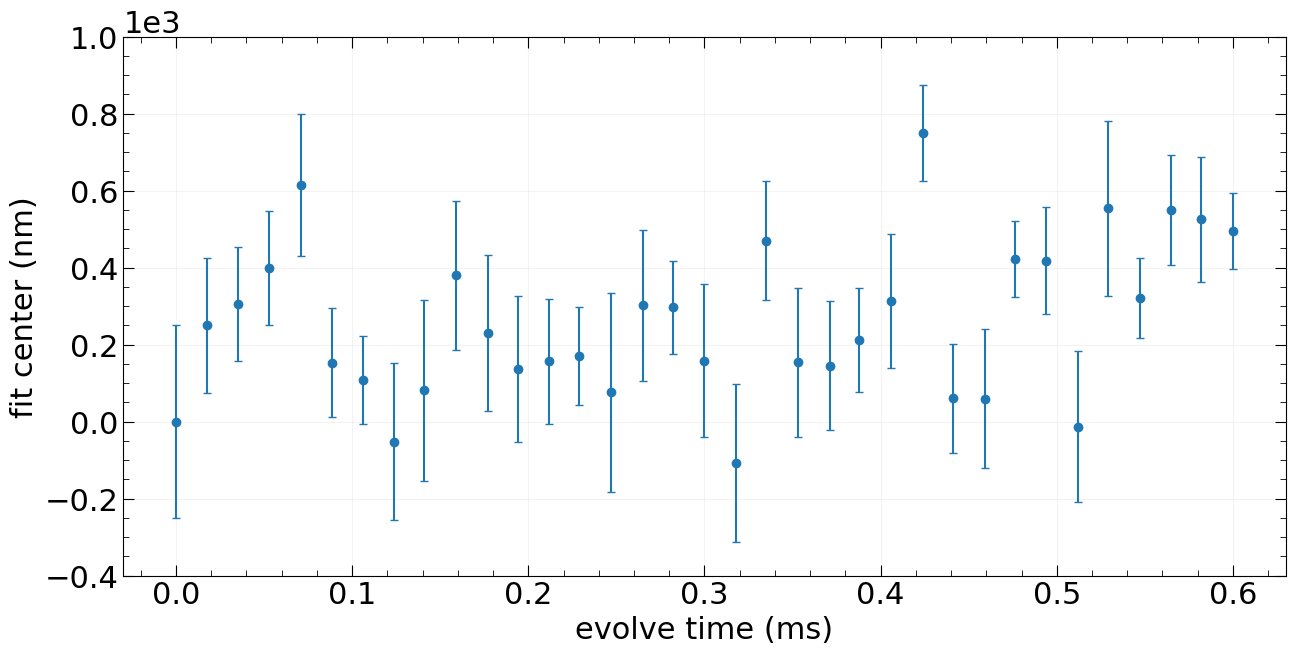

In [14]:
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))

### experimental data
color1 = 'tab:blue'
data[0] = 36.25
err[0] = 1
data[1] = 37.25
err[1] = .7

distance = [(i*16/64 - data[0]*16/64)*1e3 for i in data]
dist_err = [i*16/64*1e3 for i in err]

ax.errorbar(key, distance, dist_err, marker='o', linestyle='', capsize=3);
ax.set_ylim(-400,1000)
ax.set_ylabel('fit center (nm)')
ax.set_xlabel('evolve time (ms)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


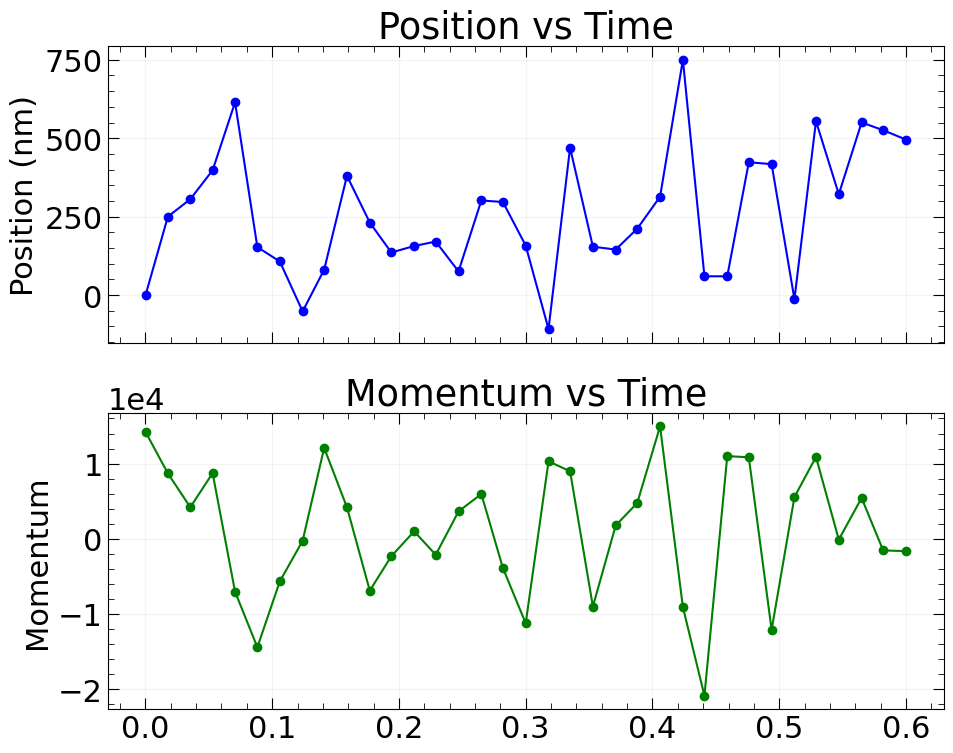

In [18]:
import numpy as np

# Example data
time = np.array(key)  # Time data
position = np.array(distance)  # Position data
mass = 1.0  # Mass of the object
velocity = np.gradient(position, time)
velocity_err = np.zeros_like(velocity)
for i in range(1, len(time) - 1):
    dt = time[i+1] - time[i-1]
    velocity_err[i] = np.sqrt(dist_err[i+1]**2 + dist_err[i-1]**2) / dt

# Handle boundary points
velocity_err[0] = velocity_err[1]
velocity_err[-1] = velocity_err[-2]

# Calculate the momentum
momentum = mass * velocity

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot position
axs[0].plot(time, position, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Position (nm)')
axs[0].set_title('Position vs Time')
axs[0].grid(True)

# Plot velocity
axs[1].plot(time, momentum, marker='o', linestyle='-', color='g')
axs[1].set_ylabel('Momentum')
axs[1].set_title('Momentum vs Time')
axs[1].grid(True)



# Show plots
plt.tight_layout()

In [127]:
1-15/15.9

0.05660377358490565

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


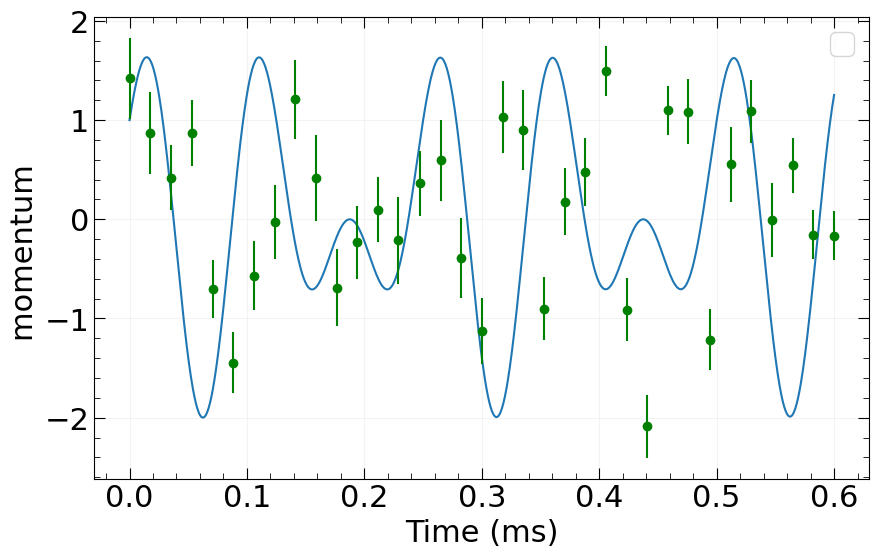

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust these to match your system)
A = 1.0  # Amplitude
omega1 = 2 * np.pi * 8  # Frequency 1 (rad/s)
omega2 = 2 * np.pi * 12 # Frequency 2 (rad/s)
phi1 = np.pi/2  # Phase 1
phi2 = 0.0  # Phase 2
gamma = 0.01  # Decay constant for damping

# Generate time data
t = np.linspace(0, .6, 1000)  # Time data from 0 to 10 seconds

# Generate position data with beating
position = A * (np.exp(-gamma * t) * (np.sin(omega1 * t + phi1) + np.sin(omega2 * t + phi2)))

# Plot the position data
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.errorbar(time, momentum*1e-4, yerr=velocity_err*5e-5,marker='o', linestyle='', color='g')

plt.xlabel('Time (ms)')
plt.ylabel('momentum ')
# plt.title('Position vs Time with Beating and Revival')
plt.legend()
plt.grid(True)
plt.show()

